# Исследование объявлений о продаже квартир


## Описание проекта


В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Данные

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

## Цель проекта

Используя данные сервиса Яндекс.Недвижимость необходимо выявить основные параметры и факторы, влияющие на рыночную цену квартиры.

### 1 Откроем  файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data=pd.read_csv('C:\\Users\\magas\\Desktop\\Шпаргалки\\real_estate_data.csv',sep='\t')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')



**1.2 Посмотрим общую информацию о датафрейме**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.3 Визуально осмотрим таблицу по первым 5 строкам**

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**1.4 Построим гистограммы по каждому столбцу и выведем общую статистику**

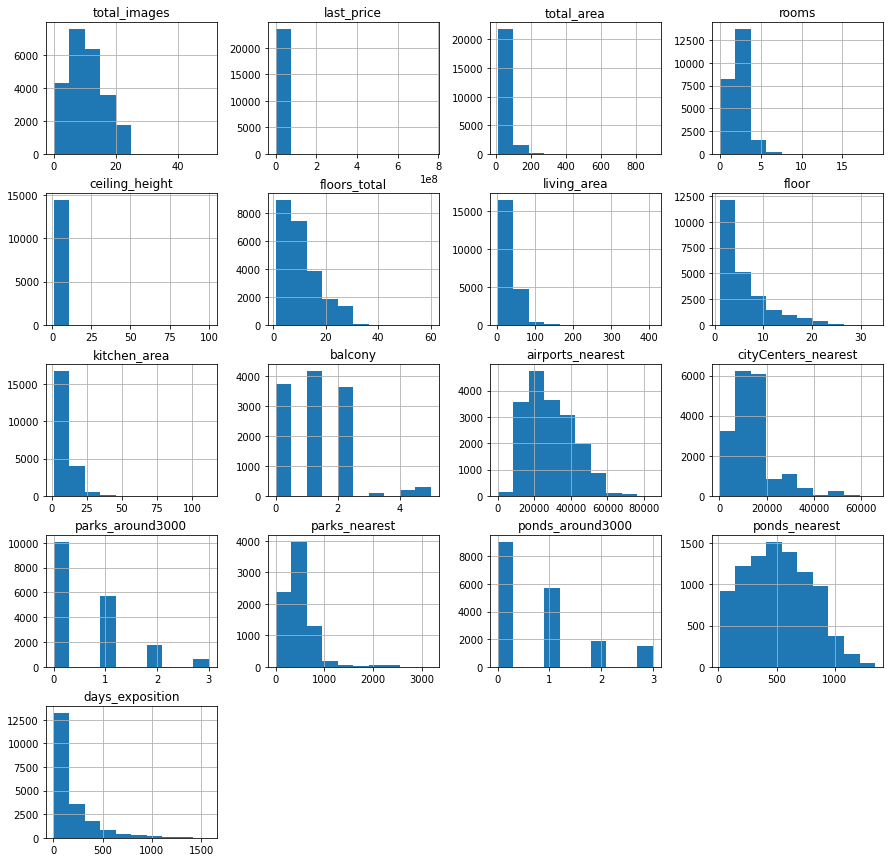

In [4]:
data.hist(figsize=(15,15))
plt.show()

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**1.5 Предварительно проверим количесвто пропусков и дубликатов**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.duplicated().sum()

0

**Предворительный вывод**

Сразу можно обратить внимание на имеющиеся пропуски и аномальные значения.
Следующие шаги:

0) Скорректируем названия столбцов и поменяем тип данных в столбцах `last_price` и `total_area`

1) Проверим корректность наименований населенных пунктов в столбце `locality_name`


2) Заполним пропуски в столбцах и проверим аномальные значения и, при необходимости, удалим неправдоподобные значения, в столбцах:

- `ceiling_height`
- `living_area`
- `is_apartment`
- `balcony`
- `kitchen_area`
- `locality_name`
- `airports_nearest`
- `city_centers_nearest`
- `total_area`
- `floors_total`

3) По возможности, заполним пропуски в столбцах:

- `parks_around_3000`
- `parks_nearest`
- `ponds_around_3000`
- `ponds_nearest`

4) Скорректируем формат даты в столбцах 
- `first_day_exposition`

###  Предобработка данных

**0 Скорректируем названия столбцов**

In [8]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest',\
'parks_around3000' : 'parks_around_3000',\
'ponds_around3000': 'ponds_around_3000'},\
    inplace=True)

**0.1 Поменяем тип данных в столбцах `last_price` и `total_area`**

Большая точность в этих стобцах не нужна, а целые числа проще читать

In [9]:
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')

**1.1 Для начала посмотрим на уникальные значения в в столбце `locality_name` и проверим неявные дубликаты**

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Список огромный, но уже видны совпадения:'посёлок Пансионат Зелёный Бор' - 'поселок Пансионат Зелёный Бор'.

**1.2 Удалим тип населенного пункта, и оставим лишь наименование**

In [11]:
def clean_location_name(x:str):
    
# функция принимает строку и удаляет из нее лишние вхождения
# например: из строки "поселок Шушары" будет удалено "поселок "


    try:
        if 'городской поселок' in x:
            return x.replace('городской посёлок ','')
        elif 'городской посёлок' in x:
            return x.replace('городской посёлок ','')
        elif 'деревня' in x:
            return x.replace('деревня','')
        elif 'коттеджный поселок' in x:
            return x.replace('коттеджный поселок ','')
        elif 'коттеджный посёлок' in x:
            return x.replace('коттеджный посёлок ','')
        elif 'поселок' in x:
            return x.replace('поселок ','')
        elif 'поселок городского типа'in x:
            return x.replace('поселок городского типа ','')
        elif 'поселок станции'in x:
            return x.replace('поселок станции ','')
        elif 'посёлок'in x:
            return x.replace('посёлок ','')
        elif 'городского'in x:
            return x.replace('посёлок городского типа ','')
        elif 'типа имени'in x:
            return x.replace('типа имени ','')
        elif 'посёлок при железнодорожной станции' in x:
            return x.replace('посёлок при железнодорожной станции ','')
        elif 'станции' in x:
            return x.replace('станции ','')
        elif 'садоводческое некоммерческое товарищество' in x:
            return x.replace('садоводческое некоммерческое товарищество ','')
        elif 'садовое товарищество' in x:
            return x.replace('садовое товарищество ','')
        elif ' село' in x:
            return x.replace('село ','')
        else:
            return x
    except:
        return x
        
    
data['locality_name'] = data['locality_name'].apply(clean_location_name)

**1.3 Удалим строки, в которых не указан населенный пункт. Таких всего 86 - количество крайне мало и не повлияет на дальнейшие иследования**

In [12]:
data=data.dropna(subset=['locality_name'])

**2 Обработка пропусков**

**2.2 Выведем уникальные знначение в столбце `balcony`.**

In [13]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

**2.2.1 Удалим пропуски в столбце `balcony` и поменяем тип данных**

Так как количество балконов не зависит от данных в других столбцах, логичнее всего предположить, что пропуски обусловленны тем, что их количество не вводилось из за их отсутствия.
Потому все пропуски поменяем на 0.

In [14]:
data['balcony'] = data['balcony'].fillna('0').astype('int',errors='ignore')

**2.3 Выведем уникальные знначение в столбце `is_apartment`**

In [15]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Как и ожидалась, в столбце только два варианта - True и False, соответствующие 'да' или 'нет'.
Пропуски, как и в случае с `balciny`, обусловлены тем, что не заполнялся в случае, если квартира не является апартаментами.
 

**2.3.1 Изменим пропуски на False**

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**2.4 Посмотрим на уникальные значения в столбце `ceiling_height`**

In [17]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Сразу бросаются в глаза неправдободобные значения: 100, 22.6, 26 и т.д.

Таких высоких потолков явно не существует. 

Вывод напрашивается сам собой - неверное расположение точки в числе(то ли ошибка при выгрузке, то ли человеческий фактор).


**2.4.1 Разделим все значения больше 10 на 10, дабы сдвинуть точку на один порядок влево**

In [18]:
data.loc[data['ceiling_height'] > 10,['ceiling_height']] = data.loc[data['ceiling_height'] > 10,['ceiling_height'] ]/ 10

**2.4.2 Удалим значения ниже 2 и выше 8**

In [19]:
data.loc[data['ceiling_height'] != 'NaN',['ceiling_height']]= (
    data.loc[(data['ceiling_height'] > 2) & 
    (data['ceiling_height'] < 10)]
)

**2.4.3 Заполним пропуски медианами.**
Скорее всего, пропуски образовались из за того, что высота потолков сренестатистическая, потому высота и не заполнялась - то есть отстутствуют какие-либо аномальные значения

In [20]:
for locality_name in data['ceiling_height'].unique():
    median = data.loc[data['locality_name'] == locality_name,'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name),'ceiling_height'] = median

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**2.5 Выведем уникальные значения столбца `floors_total`**

In [22]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

**2.5.1 Все значения - целочисленные, потому поменяем тип столбца, для простоты расчетов в дальнейшем.**

Так же видны аномалии: 60 этажей - если верить Google`у, самое высокое здание в Ленинградской области - Лахта-центр 35 этажей.

Потому проверим, сколько строк с подобным значением и, при необходимости, удалим или сдвинем точку в числе

In [23]:
data['floors_total']=data['floors_total'].astype('int',errors='ignore')

In [24]:
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


In [25]:
data.query('floors_total > 35')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
397,15,5990000,54,2018-03-22T00:00:00,2,2.65,36.0,21.4,28,False,...,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000,45,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000,80,2019-01-09T00:00:00,2,2.70,36.0,41.0,13,False,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000,75,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,False,...,12.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000,40,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,14.00,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000,40,2017-10-17T00:00:00,1,2.65,37.0,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


**2.5.2 Не похоже, что ошибка в точке. Не может быть 2,7 этажа в доме - 6 строк удаляем**

ИИ сразу удалим пропуски
Их всего 85, потому удаление так же не повлияеть на общие ислодования.
Скорее всего, пропуски обусловлены человеческим фактором, не похоже на техническую ошибку - слишком мало

In [26]:
data = data.dropna(subset=['floors_total'])

In [27]:
data = data[data['floors_total'] < 36]

**2.6 Проверим аномалии в столбце  `total_area`**
Если верить тому же Google`у, в Ленинградской области есть квартиры площадью и более 900 метров, и находятся они не только в Санкт-Петербурге. 

Потому самым верным решение - оставить данные как есть.

In [28]:
data['total_area'].describe()

count    23559.000000
mean        60.096354
std         35.672294
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

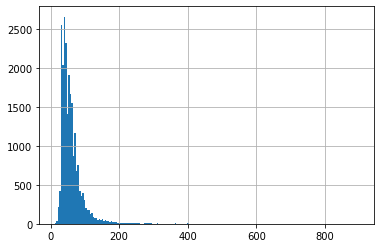

In [29]:
data['total_area'].hist(bins=200,)

<AxesSubplot:>

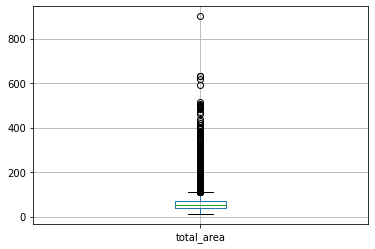

In [30]:
data.boxplot('total_area')

<AxesSubplot:>

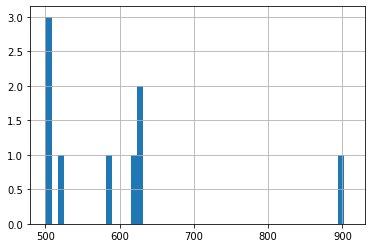

In [31]:
data['total_area'].hist(bins=50,range=(500,910))

Удалим квартиры больше 500, так как они редки и явно похожи на выброс

In [32]:
data = data[data['total_area'] < 510]

**2.7 Устраним аномалии в `rooms`**

В таблице с общей информацией можно было заметить, что в столбце `rooms`, в минимальном значении, имеется квартира с нулевым количеством комнат. Этого быть не может, т.к. даже самая маленькая студия - это 1комнатная квартира.
Также смущает 19 комнат - надо проверить

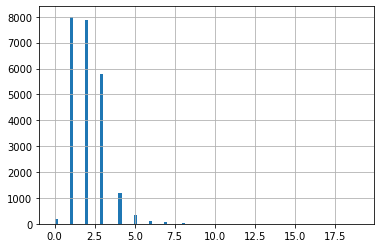

<AxesSubplot:>

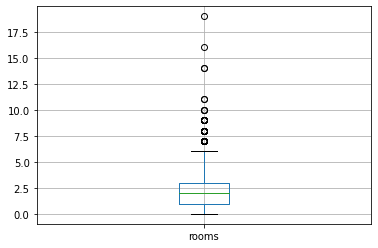

In [33]:
data['rooms'].hist(bins=100)
plt.show()
data.boxplot('rooms')

In [34]:
data.query('rooms > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
52,20,11795000,136,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,...,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
201,5,10880000,123,2015-11-12T00:00:00,6,3.20,5.0,89.00,2,False,...,11.0,0,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0
464,15,66571000,280,2015-06-11T00:00:00,6,5.20,8.0,159.50,7,False,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
509,5,90000000,225,2016-06-26T00:00:00,6,2.65,4.0,134.00,2,False,...,19.5,2,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0
581,20,65000000,365,2019-03-18T00:00:00,7,2.90,7.0,NaN,7,False,...,NaN,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,20,24800000,231,2015-01-21T00:00:00,6,3.10,5.0,99.80,4,False,...,27.4,0,Санкт-Петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,NaN
23395,4,40000000,188,2017-05-29T00:00:00,6,2.65,6.0,109.51,4,False,...,31.3,0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,30.0
23400,17,30000000,213,2017-09-28T00:00:00,7,3.40,5.0,151.40,5,False,...,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0
23448,3,14700000,180,2018-02-08T00:00:00,6,3.00,6.0,126.00,5,False,...,20.0,0,Санкт-Петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN


Как видим, квартиры, в которым больше 5 комнат, можно отнести к редкими выбросами. В дальнейшем, они могут исказить исследования, потому удалим их

In [35]:
data= data[data['rooms'] < 6]

In [36]:
data[data['rooms'] < 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,...,NaN,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,...,NaN,1,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,0,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,...,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,...,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


**2.7.1. Посмотрим максимальную площадь этих квартир.**

In [37]:
data[data['rooms'] <1]['total_area'].describe()

count    194.000000
mean      29.123711
std       26.060415
min       15.000000
25%       24.000000
50%       26.000000
75%       28.000000
max      371.000000
Name: total_area, dtype: float64

**2.7.2 Как мы видим, разброс по площади таких квартир велик.**

Можно перепроверить каждое аномальное значение, изменить 0 на медианы по количеству комнат.

ОДнако, это больше исказит данные, нежели удаление менее 1% некорректных данных.

Потому, эти 194 строки удалим.


In [38]:
data = data[data['rooms'] >=1]

**2.8 Заполним пропуски в столбце `living_area`**

Есть предположение, что жилая площадь может зависеть либо от  количества комнат.

Потому проверим корреляцию.

In [39]:
data['living_area'].corr(data['rooms'])

0.8412838315406808

Как видим, зависимость высока потому заполним по среднему значению относительно количества комнат

**2.8.1 Заполним пропуски медианами**

In [40]:
rooms_pivot = data.pivot_table(index='rooms', values='living_area', aggfunc=['median'])
rooms_pivot.columns = ['median']
rooms_pivot

,median
rooms,
1,17.600
2,30.500
3,45.000
4,63.650
5,91.785


In [41]:
def data_replace(data, data_pivot,column1,column2):
    
    for column, value in data_pivot['median'].items(): 
        data.loc[(data.loc[:,column1]== column) &(data.loc[:, column2].isnull()), column2] = value

In [42]:
data_replace(data, rooms_pivot,'rooms','living_area')  

In [43]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2009
balcony                     0
locality_name               0
airports_nearest         5441
city_centers_nearest     5419
parks_around_3000        5418
parks_nearest           15303
ponds_around_3000        5418
ponds_nearest           14336
days_exposition          3099
dtype: int64

**2.9 Заполним пропуски в `kitchen_area`**

Пример с квартирой в 900 кв.м показывает, что и кухни могут быть огромными.
Потому не будем обращать внимание на выдающиеся значения и заполним пропуски мадианами.
Сами же пропуски, скорее всего, из за этоо и появились - кухня обычная - незачем ее указывать

**2.9.1 Проверим, зависит ли размер кухни от общей площади**

In [44]:
data['kitchen_area'].corr(data['total_area'])

0.5955448022727534

**2.9.2 Зависимость небольшая, потому не будем обращать на нее внимание и заполним общей медианой**

In [45]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

**2.10 Заполним пропуски в `airports_nearest`**

**2.10.1 Для заполнения пропусков так же сгруппируем по городам и подставим медианы**

In [46]:
airports_nearest_pivot = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['median'])
airports_nearest_pivot.columns = ['median']
airports_nearest_pivot

,median
locality_name,
Александровская,12896.5
Белоостров,57769.0
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25717.0
Кронштадт,67872.5
Левашово,52693.0
Лисий Нос,55909.0
Ломоносов,48415.5


In [47]:
data_replace(data, rooms_pivot,'locality_name','airports_nearest')  

**2.11 Заполним пропуски в `city_centers_nearest`, повторив шаги с `airports_nearest`**

In [48]:
city_centers_pivot = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['median'])
city_centers_pivot.columns = ['median']
city_centers_pivot

,median
locality_name,
Александровская,27468.0
Белоостров,38868.0
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29142.0
Кронштадт,49597.5
Левашово,25727.0
Лисий Нос,28226.0
Ломоносов,51677.0


In [49]:
data_replace(data, rooms_pivot,'locality_name','airports_nearest')

**2.11 Посмотрим информацию по столбцe `parks_around_3000`**


In [50]:
data.query('parks_around_3000 == "NaN" and parks_nearest <= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Проверим уникальные значения

In [51]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

**2.11.1Как видим, среди пропусков в `parks_around_3000` нет строк, где parks_nearest будет меньше 3000, потому пропуски, скорее всего, означают отсутствие парков поблизости. Потому заполним им 0.**

In [52]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

**2.12 Проверим `parks_nearest`**

In [53]:
data.query('parks_nearest == "NaN" and parks_around_3000 != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


**2.12.1 Среди пропусков в `parks_nearest` нет строк с имеющимися парками, потому заполним пропуски с помощью `data_replace`**

In [54]:
parks_nearest_pivot = data.pivot_table(index='locality_name', values='parks_nearest', aggfunc=['median'])
parks_nearest_pivot.columns = ['median']
parks_nearest_pivot

,median
locality_name,
Зеленогорск,147.5
Колпино,393.0
Красное Село,428.5
Кронштадт,289.5
Ломоносов,407.0
Павловск,310.0
Парголово,733.0
Петергоф,294.0
Пушкин,398.0


In [55]:
data_replace(data,parks_nearest_pivot, 'locality_name','parks_nearest')

**2.13 Со столбцами `ponds_around_3000` и `ponds_nearest` сделаем все то же самое**

In [56]:
data.query('ponds_around_3000 == "NaN" and ponds_nearest <= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [57]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

In [58]:
data.query('ponds_nearest == "NaN" and ponds_around_3000 != 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [59]:
ponds_nearest_pivot = data.pivot_table(index='locality_name', values='ponds_nearest', aggfunc=['median'])
ponds_nearest_pivot.columns = ['median']
ponds_nearest_pivot

,median
locality_name,
Александровская,711.5
Белоостров,320.0
Зеленогорск,507.0
Колпино,509.0
Красное Село,225.5
Кронштадт,308.0
Ломоносов,553.0
Павловск,458.0
Парголово,593.0


In [60]:
data_replace(data,ponds_nearest_pivot, 'locality_name','ponds_nearest')

**4 Поменяем формат дат** 

In [61]:
data['first_day_exposition'] = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23171 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23171 non-null  int64         
 1   last_price            23171 non-null  int64         
 2   total_area            23171 non-null  int64         
 3   first_day_exposition  23171 non-null  datetime64[ns]
 4   rooms                 23171 non-null  int64         
 5   ceiling_height        23171 non-null  float64       
 6   floors_total          23171 non-null  float64       
 7   living_area           23171 non-null  float64       
 8   floor                 23171 non-null  int64         
 9   is_apartment          23171 non-null  bool          
 10  studio                23171 non-null  bool          
 11  open_plan             23171 non-null  bool          
 12  kitchen_area          23171 non-null  float64       
 13  balcony         

**ЗАКЛЮЧЕНИЕ ПО ПЕРВОМУ ЭТАПУ**


Предварительную предобработку сделал. Заполнил пропуски и удалил самые выдающиеся аномальные значения.
Более глубокую "чистку" данных буду проводить проводя уже более детальный анализ в 3 пункте

### Посчитайте и добавьте в таблицу новые столбцы

**Необходимо добавить следующие столбцы:**

- цена одного квадратного метра - `one_m2_price`

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - `day_publication`
- месяц публикации объявления - `month_publication`
- год публикации объявления - `year_publication`
- тип этажа квартиры (значения — «первый», «последний», «другой») - `floor_type`
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) - `city_centers_nearest_km`

Добавим столбец с ценой за 1 квадратный метр

In [63]:
data['one_m2_price'] = (data['last_price'] / data['total_area'])

In [64]:
pd.to_numeric(data['one_m2_price'])

0        120370.370370
1         83750.000000
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72932.330827
23695     52542.372881
23696     44642.857143
23697    150986.842105
23698     42187.500000
Name: one_m2_price, Length: 23171, dtype: float64

Добавим столбец с днем публикации

In [65]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

Укажем названия дней

In [66]:
def day_replace(data):
    
# Переписывает значения в столбце 'day_publication' по дням недели в соответствии с их порядковым номером


    if data == 0:
        return 'понедельник'
    elif data == 1:
        return 'вторник'
    elif data == 2:
        return 'среда'
    elif data == 3:
        return 'четверг'
    elif data == 4:
        return 'пятница'
    elif data == 5:
        return 'суббота' 
    elif data == 6 :
        return 'воскресенье'
    else:
        return 'нет'
        
    
data['day_publication'] = data['day_publication'].apply(day_replace)

Добавим столбцы с месяцем  и годом публикации

In [67]:
data['month_publication'] = data['first_day_exposition'].dt.month

In [68]:
data['year_publication'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа

In [69]:
def floor_type(data):
    try:
        a = data['floors_total']
        if data['floor'] == 1:
            return 'Первый'
        if data['floor'] == a:
            return 'Последний'
        else:
            return 'Другой'
    except:
        return 'не получилось'

In [70]:
data['floor_type'] = data.apply(floor_type, axis = 1)

Добавим столбец с растоянием до центра в километрах

In [71]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] // 1000

# Проведем исследовательский анализ данных

Изучим данные в следубщих столбцах:

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления


**ОБЩАЯ ПЛОЩАДЬ**

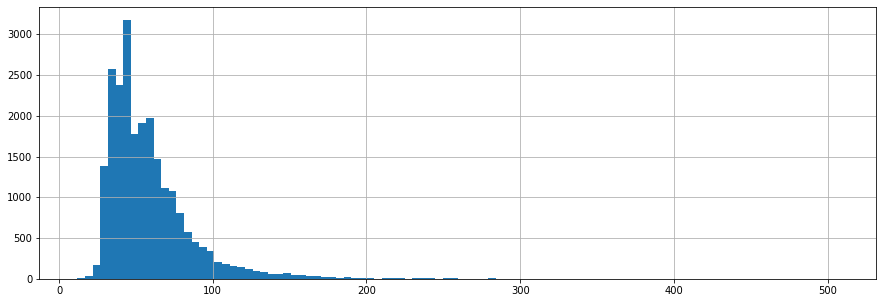

count    23171.000000
mean        58.867377
std         30.097460
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        507.000000
Name: total_area, dtype: float64

In [72]:
data['total_area'].hist(bins =100,figsize=(15,5))
plt.show()
data['total_area'].describe()

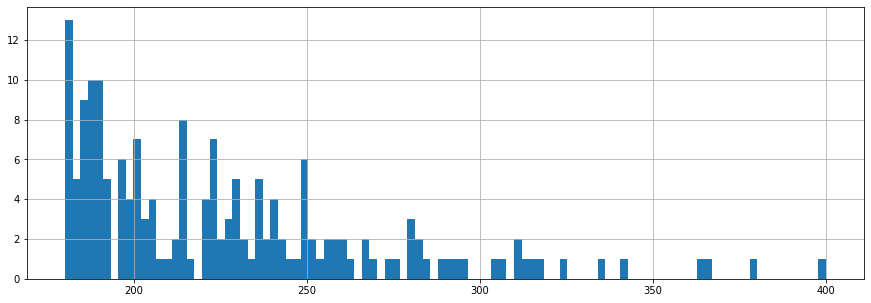

In [73]:
data['total_area'].hist(bins =100,figsize=(15,5),range=(180,400))
plt.show()

Несмотря на огромную разницу между максимальной площадью и минимальной, среднее значение не сильно отличается от медианы, что можно видеть и на первом графике.

На втором графике видно, что квартир площадью больше 200 не так уж и много.
Потому, для дальнейшего анализа их исключим.

In [74]:
good_data = data.query('total_area < 190')

In [75]:
data['total_area'].describe()

count    23171.000000
mean        58.867377
std         30.097460
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        507.000000
Name: total_area, dtype: float64

<AxesSubplot:>

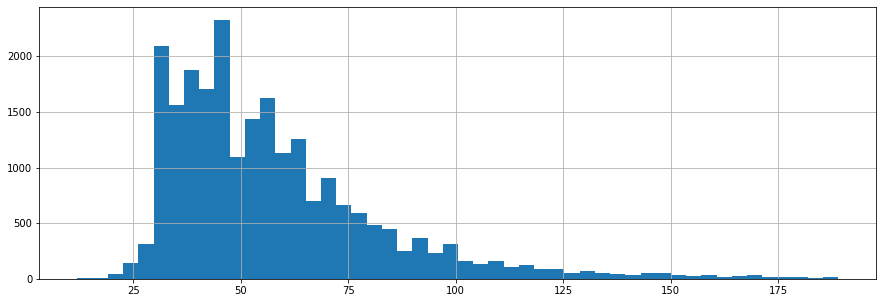

In [76]:
good_data['total_area'].hist(bins=50,figsize=(15,5))

**ЖИЛАЯ ПЛОЩАДЬ**

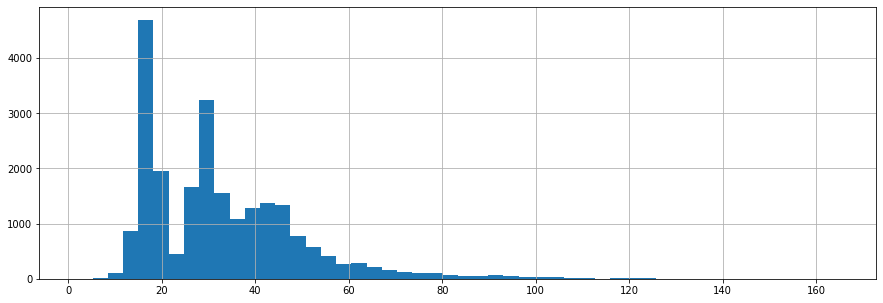

count    23028.000000
mean        32.919423
std         16.444657
min          2.000000
25%         18.400000
50%         30.200000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [77]:
good_data['living_area'].hist(bins =50,figsize=(15,5))
plt.show()
good_data['living_area'].describe()

Жилая площадь в 2 квадратных метра? Неправдободобно.
возьем минимальное значение общей площади и проверим, сколько квартир с жилой площадью меньше этого значения

In [78]:
good_data.query('living_area < 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m2_price,day_publication,month_publication,year_publication,floor_type,city_centers_nearest_km
6,6,3700000,37,2017-11-02,1,2.65,26.0,10.60,6,False,...,733.0,0.0,593.0,155.0,100000.000000,четверг,11,2017,Другой,19.0
114,5,4000000,21,2019-02-07,1,2.90,8.0,8.30,7,False,...,488.0,1.0,286.0,NaN,190476.190476,четверг,2,2019,Другой,5.0
248,7,4100000,31,2015-08-02,1,3.00,17.0,10.00,6,False,...,139.0,0.0,505.0,637.0,132258.064516,воскресенье,8,2015,Другой,8.0
615,15,4100000,43,2017-06-30,1,2.65,18.0,10.00,12,False,...,NaN,0.0,NaN,18.0,95348.837209,пятница,6,2017,Другой,NaN
680,14,7200000,43,2017-10-31,1,2.65,8.0,9.00,2,False,...,2137.0,1.0,933.0,296.0,167441.860465,вторник,10,2017,Другой,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23014,8,2250000,28,2017-08-04,1,3.70,3.0,10.90,2,False,...,170.0,3.0,110.0,424.0,80357.142857,пятница,8,2017,Другой,53.0
23208,12,4800000,37,2016-02-24,1,2.65,14.0,8.00,11,False,...,358.0,1.0,950.0,139.0,129729.729730,среда,2,2016,Другой,12.0
23359,10,3114406,36,2018-10-01,1,2.65,5.0,10.00,5,False,...,251.0,1.0,350.0,145.0,86511.277778,понедельник,10,2018,Последний,25.0
23481,1,3000000,37,2019-04-15,1,2.65,19.0,10.08,10,False,...,462.0,0.0,505.0,7.0,81081.081081,понедельник,4,2019,Другой,15.0


3 квадратных метра при общей площади в 139? Да даже 10 метров при 40 выглядить неправдоподобно.
Данные могут внести смуту, потому исключим такие квартиры из анализа.

In [79]:
good_data = good_data.query('living_area > 11')

Такая разница графиков между общей площадью и жилой может быть обуслевлена тем, что студия в 20кв.м может иметь дилую площадь в 15кв.м, а 1 комнатная квартира иметь те же 15кв.м жило площади при 25кв.м. общей площади.

Есть гипотеза, что первый пик - апартаменты, второй пик - квартиры. Проверим

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

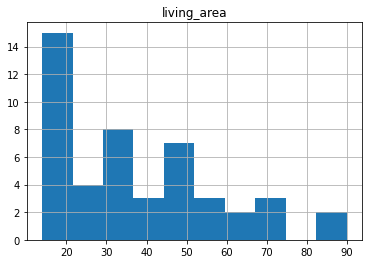

In [80]:
good_data.query('is_apartment == True').hist('living_area')

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

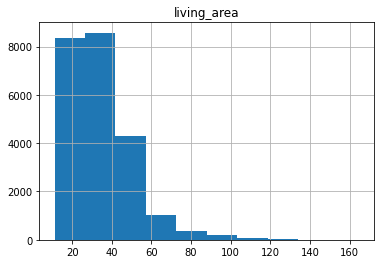

In [81]:
good_data.query('is_apartment == False').hist('living_area')

Оба распределения похожи на нормальные, потому можно сделать вывод, что два пика обусловлены именно типом квартиры

**ПЛОЩАДЬ КУХНИ**

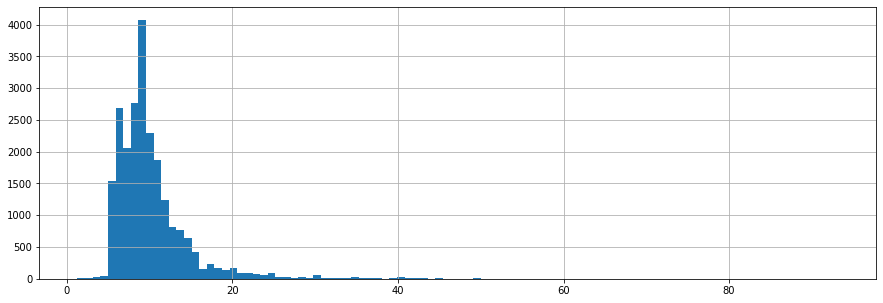

count    22933.000000
mean        10.210121
std          5.097115
min          1.300000
25%          7.200000
50%          9.000000
75%         11.290000
max         93.200000
Name: kitchen_area, dtype: float64

In [82]:
good_data['kitchen_area'].hist(bins=100,figsize = (15,5))
plt.show()
good_data['kitchen_area'].describe()

Поближе изучим кухни от 25 кв.м

<AxesSubplot:>

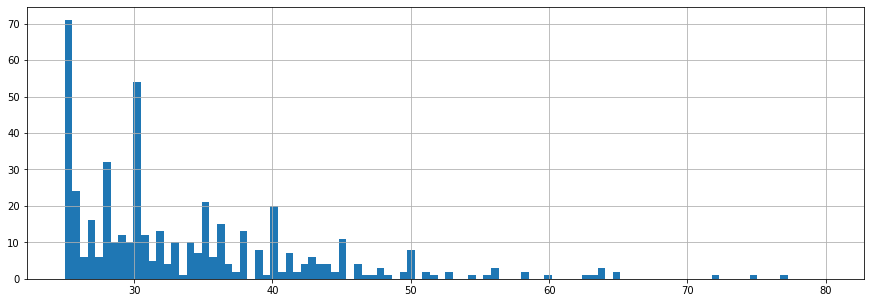

In [83]:
good_data['kitchen_area'].hist(bins=100,figsize = (15,5), range=(25,80))

<AxesSubplot:>

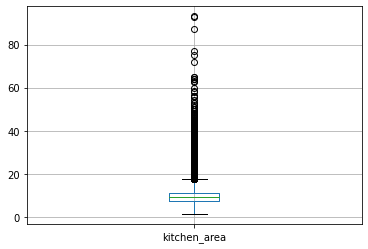

In [84]:
good_data.boxplot('kitchen_area')

Как показывают графики, кухни больше 50 кв.м. редки и похожи на выбросы - удаляем.

In [85]:
good_data = good_data.query('kitchen_area < 51')

**ЦЕНА ОБЪЕКТА**

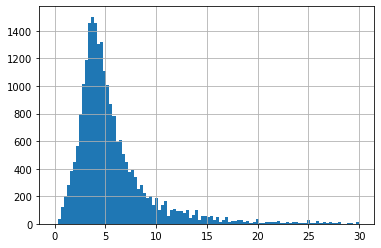

count    22907.000000
mean         5.933076
std          5.529092
min          0.012190
25%          3.425000
50%          4.600000
75%          6.650000
max        289.238400
Name: last_price, dtype: float64

In [86]:
(good_data['last_price']/1000000).hist(bins=100,range=(0,30))
plt.show()
(good_data['last_price']/1000000).describe()

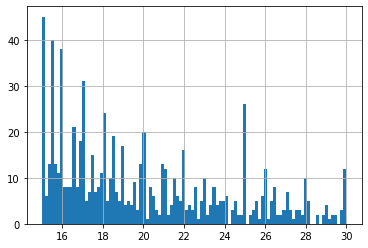

count    22907.000000
mean         5.933076
std          5.529092
min          0.012190
25%          3.425000
50%          4.600000
75%          6.650000
max        289.238400
Name: last_price, dtype: float64

In [87]:
(good_data['last_price']/1000000).hist(bins=100,range=(15,30))
plt.show()
(good_data['last_price']/1000000).describe()

Распределение нормальное.

**КОЛИЧЕСТВО КОМНАТ**

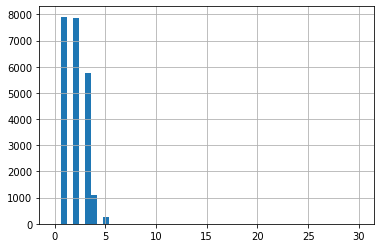

count    22907.000000
mean         2.035884
std          0.943170
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

In [88]:
good_data['rooms'].hist(bins=50,range=(0,30))
plt.show()
good_data['rooms'].describe()

больше всего 1- и 2-комнатных квартир. Чуть меньше 3-комнатных, и резкий спад в 4- и 5- комнатных.

**ВЫСОТА ПОТОЛКОВ**

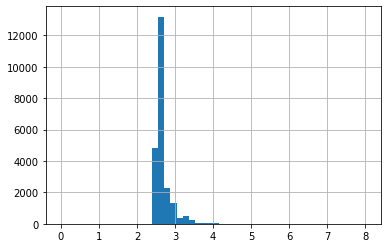

count    22907.000000
mean         2.691529
std          0.218619
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

In [89]:
good_data['ceiling_height'].hist(bins=50,range=(0,8))
plt.show()
good_data['ceiling_height'].describe()

Распределение нормальное, пик приходится на 2.6 метров

**ЭТАЖ КВАРТИРЫ**

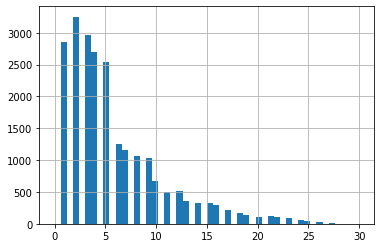

count    22907.000000
mean         5.866373
std          4.856376
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [90]:
good_data['floor'].hist(bins=50,range=(0,30))
plt.show()
good_data['floor'].describe()

Как видим, больше всего квартир на первых 5 этажах. Далее резкий спад.

**ТИП ЭТАЖА КВАРТИРЫ**

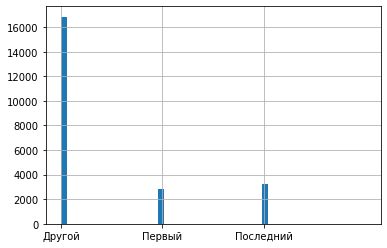

count      22907
unique         3
top       Другой
freq       16849
Name: floor_type, dtype: object

In [91]:
good_data['floor_type'].hist(bins=50,range=(0,3))
plt.show()
good_data['floor_type'].describe()

Чего и следовало ожидать - квартиры на первом и последнем этаже пользуются меньшей популярностью

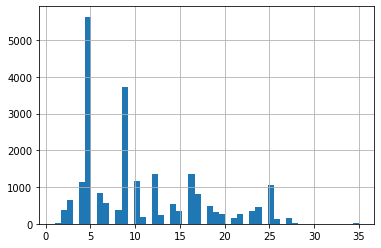

count    22907.000000
mean        10.668398
std          6.553933
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

In [92]:
good_data['floors_total'].hist(bins=50,range=(1,35))
plt.show()
good_data['floors_total'].describe()

Наследие СССР еще живо - больше всего 5- и 9-этажных домов

**РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА**

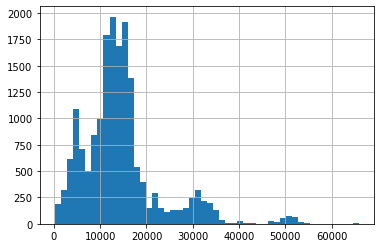

count    17510.000000
mean     14336.279098
std       8596.343512
min        181.000000
25%       9529.000000
50%      13171.000000
75%      16318.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [93]:
good_data['city_centers_nearest'].hist(bins=50,)
plt.show()
good_data['city_centers_nearest'].describe()

**РАССТОЯНИЕ ДО АЭРОПОРТА**

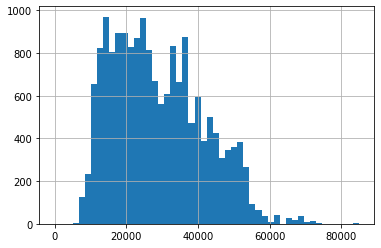

count    17490.000000
mean     28864.793139
std      12695.535282
min          0.000000
25%      18487.250000
50%      26918.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [94]:
good_data['airports_nearest'].hist(bins=50,)
plt.show()
good_data['airports_nearest'].describe()

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА**

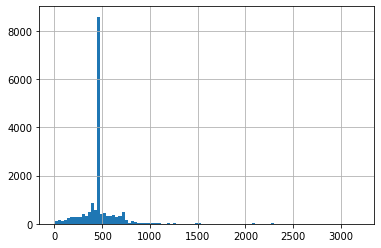

count    17027.000000
mean       477.442415
std        235.493569
min          1.000000
25%        428.500000
50%        462.000000
75%        462.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [95]:
good_data['parks_nearest'].hist(bins=100)
plt.show()
good_data['parks_nearest'].describe()

Вызывает подозрение 462 метра до парка - выбивается слишком сильно (результат заполнения пропусков неочными данными).
Удалим

In [96]:
good_data = good_data.query('parks_nearest !=462')

**ДЕНЬ ПУБЛИКАЦИИ**

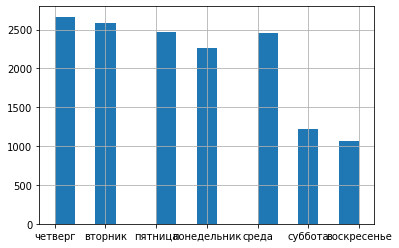

count       14726
unique          7
top       четверг
freq         2665
Name: day_publication, dtype: object

In [97]:
good_data['day_publication'].hist(bins=15,)
plt.show()
good_data['day_publication'].describe()

**ВЫВОД**

Даже в продажах квартир бывают выходные

**МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ**

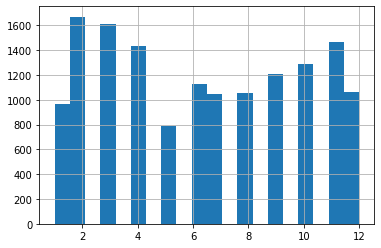

count    14726.000000
mean         6.380212
std          3.508788
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

In [98]:
good_data['month_publication'].hist(bins=20)
plt.show()
good_data['month_publication'].describe()

Новый год - новая жизнь. БОльше всего продают в феврале, меньше всего - в мае

**ГОД ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ**

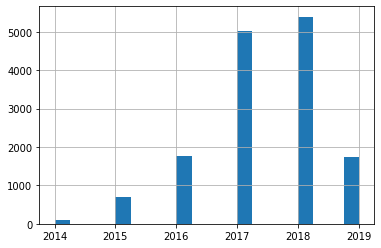

count    14726.000000
mean      2017.367310
std          1.036653
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_publication, dtype: float64

In [99]:
good_data['year_publication'].hist(bins=20)
plt.show()
good_data['year_publication'].describe()

**ВЫВОД**

С каждым годом продавалось все больше квартир. 
Однако и тут видны последствия пандемии - резский спад в 2019 году

# ТЕПЕРЬ ПОСМОТРИМ, КАК БЫСТРО ПРОДАЮТСЯ КВАРТИРЫ

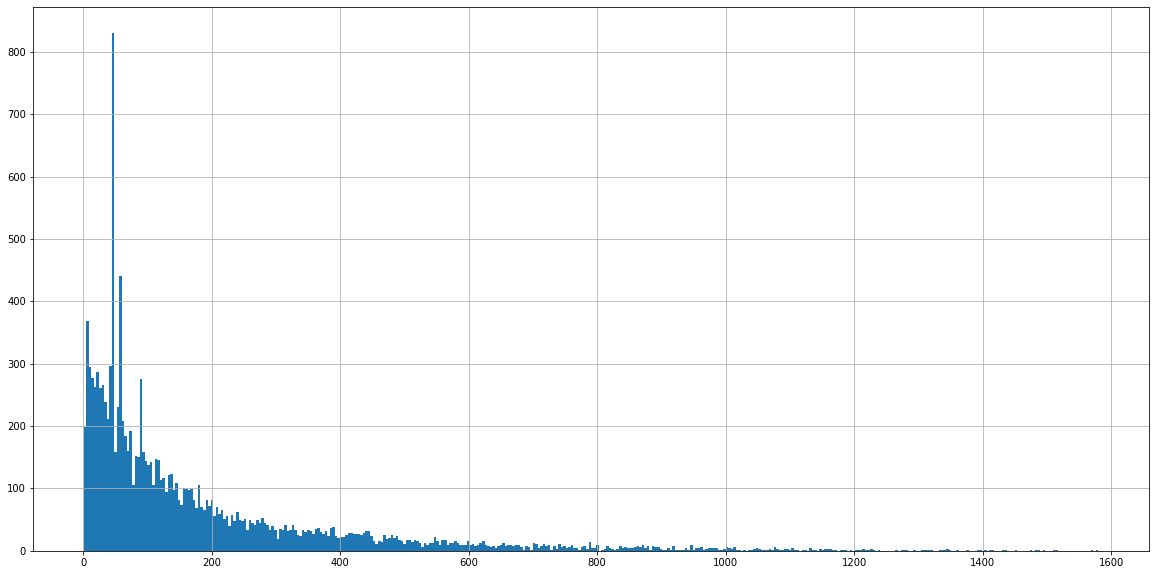

count    12647.000000
mean       184.406104
std        220.895138
min          1.000000
25%         45.000000
50%         99.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [100]:
good_data['days_exposition'].hist(bins=400,figsize = (20,10))
plt.show()
good_data['days_exposition'].describe()

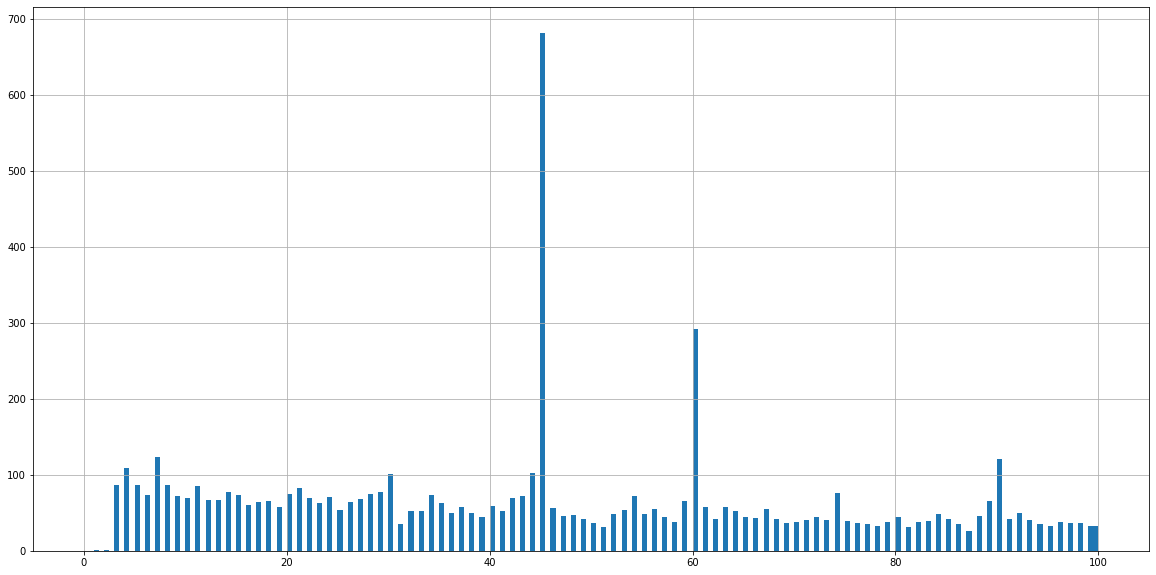

In [101]:
good_data['days_exposition'].hist(bins=200,figsize = (20,10),range=(0,100))
plt.show()

<AxesSubplot:>

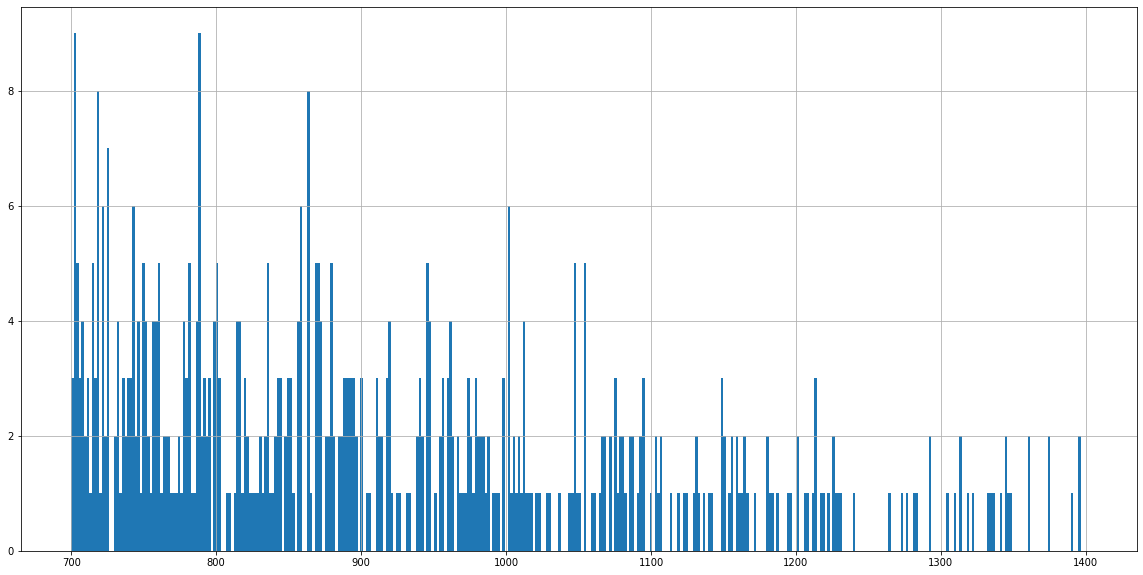

In [102]:
good_data['days_exposition'].hist(bins=400,figsize = (20,10),range=(700,1400))

1 - Есть выбросы на 7, 30,45,60 и 90 - Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил. От того и всплески "продаж"

2 - Хвост распределения очень длинный и после 700 объявлений очень мало. 

Скорректируем

In [103]:
good_data = good_data.query('days_exposition < 700')

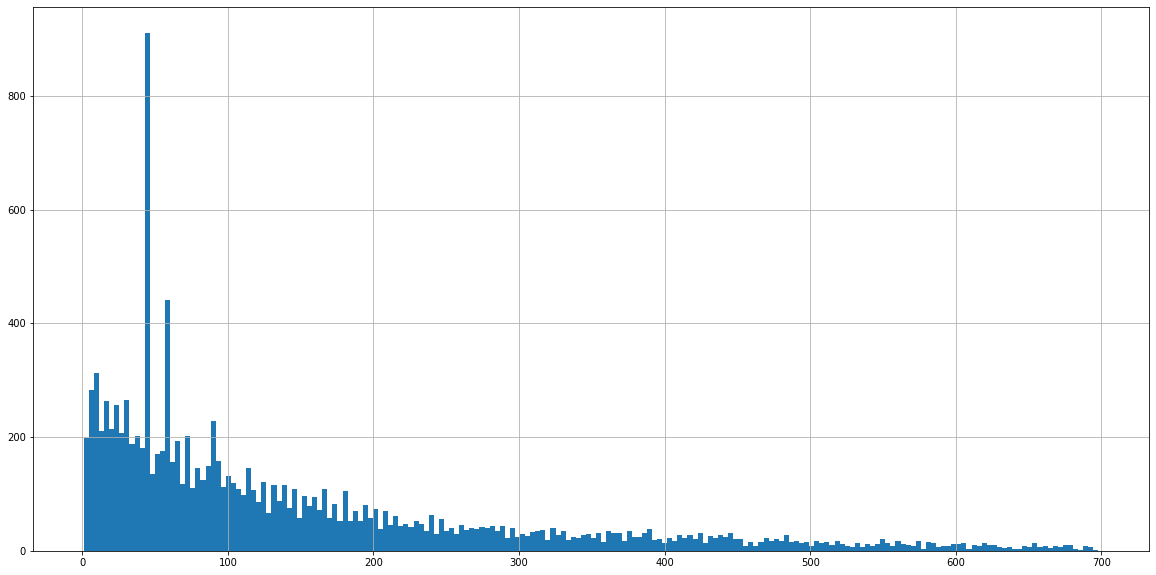

count    12101.000000
mean       150.643501
std        151.377970
min          1.000000
25%         45.000000
50%         92.000000
75%        209.000000
max        698.000000
Name: days_exposition, dtype: float64

In [104]:
good_data['days_exposition'].hist(bins=200,figsize = (20,10))
plt.show()
good_data['days_exposition'].describe()

Теперь лучше.


### ВЫВОД

Половина квартир продается за 3 месяца. 

Четверть продается за 1.5 месяцев 

Следовательно, все, что дольше 6 месяцев - долгая продажа

# ВЫЯСНИМ, КАКИЕ ФАКТОРЫ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ОБЩУЮ СТОИМОСТЬ ОБЪЕКТ

Для начала напишем функцию для построения графика корреляции

In [105]:
def make_graphic(a,b='last_price',graphic_type = 'scatter'):
    
    
    good_data.plot(x=a,y=b,kind='scatter')
    plt.show()
    
    try:
        print(good_data[a].corr(good_data[b]))
    except:
        print('строки и числа не корелируются')

### Посмотрим на корреляцию стоимости и общей площади

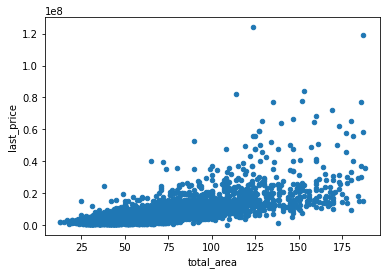

0.6925158664332864


In [106]:
make_graphic('total_area')

**ВЫВОД**


Зависимость есть, но не очень большая. 

### Посмотрим на корреляцию стоимости ижилой площади

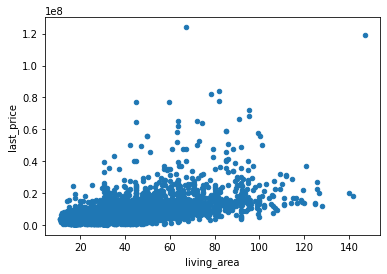

0.5655015821323895


In [107]:
make_graphic('living_area')

**ВЫВОД**

Корреляция близка к устойчивой, потому нельзя сказать, что жилая площадь сиьлно влияет на цену

### Посмотрим на корреляцию стоимости и площади кухни


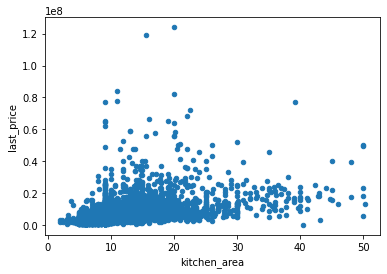

0.48310464140782733


In [108]:
make_graphic('kitchen_area')

**ВЫВОД**

Та же картина, что и с жилой площадью. Нынче меньше душевных посиделок на кухне...

### Посмотрим на корреляцию стоимости и rколичества комнат


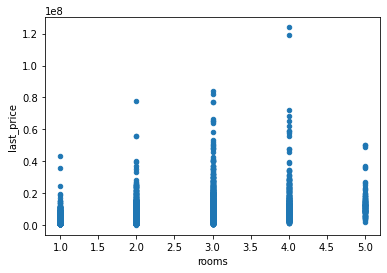

0.396748724558291


In [109]:
make_graphic('rooms', graphic_type='line')

Корреляция небольшая. Это может быть связано с тем, что цена одного кв метра падает с увеличением количества комнат. 

СРазу и проверим эту гипотезу

In [110]:
good_data.pivot_table(index='rooms',values='one_m2_price',aggfunc='median')

,one_m2_price
rooms,
1,93103.448276
2,83697.674419
3,83050.847458
4,89263.110307
5,89506.172840


**ВЫВОД**

Как ни странно, от увеличения количества комнат общая цена не сильно растет

### Посмотрим на корреляцию стоимости и типа этажа, на котором расположена квартира (первый, последний, другой)


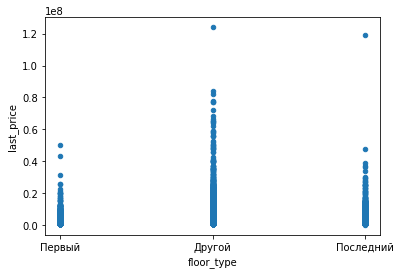

строки и числа не корелируются


In [111]:
make_graphic('floor_type')

**ВЫВОД**

И тут корреляции, в принципе, не наблюдается

### Посмотрим на корреляцию стоимости от дня, месяца и года размещения объявления

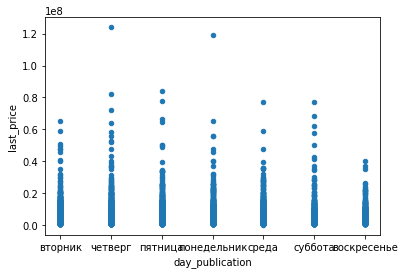

строки и числа не корелируются


In [112]:
make_graphic('day_publication')

In [113]:
def make_graphic2(index):
    pivot = good_data.pivot_table(index=index,values='last_price',aggfunc='median')
    print(pivot)
    pivot.plot(figsize=(15,5),grid=True)
    

                 last_price
day_publication            
воскресенье         3950000
вторник             4150000
понедельник         4150000
пятница             4100000
среда               4100000
суббота             4170000
четверг             4199500


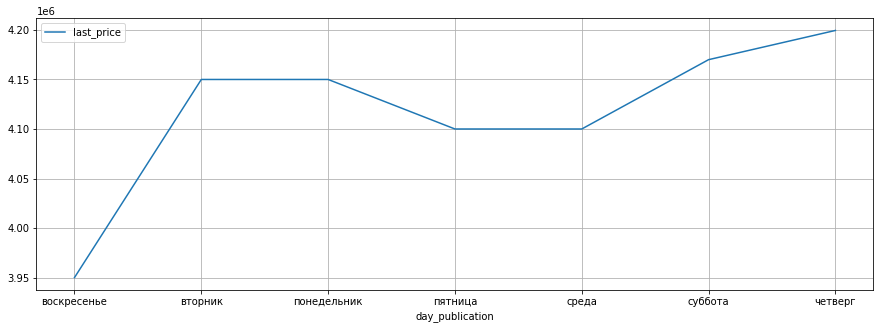

In [114]:
    make_graphic2('day_publication')

                   last_price
month_publication            
1                     4000000
2                     4100000
3                     3950000
4                     4200000
5                     4200000
6                     3995000
7                     4119050
8                     4150000
9                     4250000
10                    4150000
11                    4250000
12                    4100000


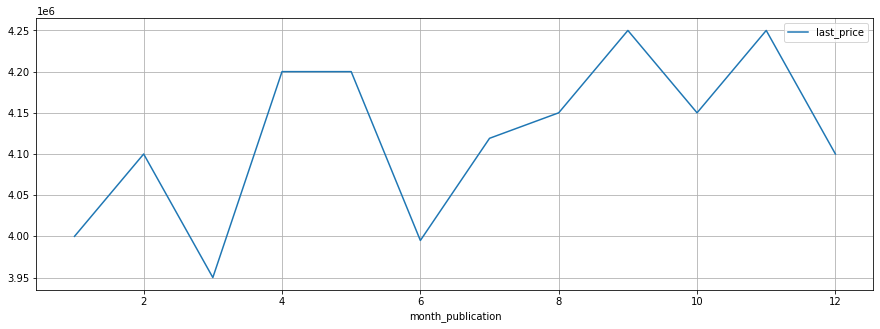

In [115]:
    make_graphic2('month_publication')

                  last_price
year_publication            
2014                 6845000
2015                 4675000
2016                 4153500
2017                 4110000
2018                 4050000
2019                 4250000


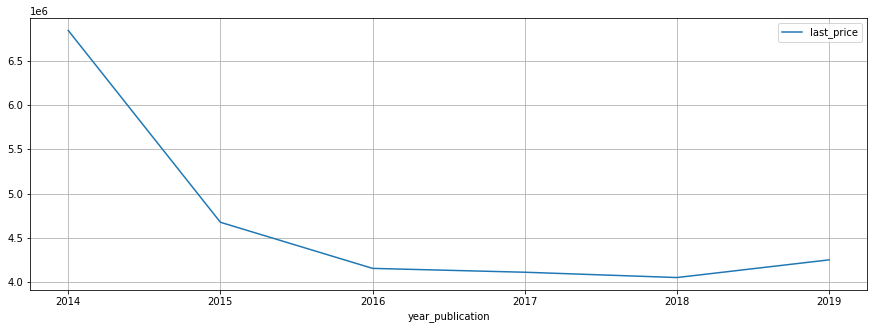

In [116]:
    make_graphic2('year_publication')

**ВЫВОД**

Выгоднее всего покупать в воскресенье, в апреле или июне.
Осенью квартиры дорожают, а с началом нового года дешевеют (неужто новогодний ажиотаж?)
А падение связано, скорее всего, с перенасыщением. Как мы помним, количество объявлений увеличивалось

# Общий вывод 

Как показывают графики, из предложенных в задании критериев, самым важным оказалась общая площадь объекта.
Меньше всего на цену влияет количество и тип этажа

# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [117]:
sort = good_data.groupby('locality_name').agg({'locality_name' : 'count','one_m2_price' : 'median'})
sort.columns = ['count', 'price_1m2']

In [118]:
sort.sort_values(by='count',ascending=False).head(10)

,count,price_1m2
locality_name,,
Санкт-Петербург,5662,105263.157895
Мурино,500,85403.225806
Шушары,388,76537.063953
Всеволожск,321,65789.473684
Колпино,301,73863.636364
Пушкин,286,98575.757576
Парголово,284,91666.666667
Кудрово,264,91930.232558
Гатчина,252,67694.497154


**ВЫВОД**

Как и ожидалось - в Питере и объявлений больше, и цена выше

#  Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра

In [119]:
data_spb = good_data.query('locality_name == "Санкт-Петербург"')

In [120]:
data_spb_pivot = data_spb.pivot_table(index='city_centers_nearest_km',values='one_m2_price')
data_spb_pivot

,one_m2_price
city_centers_nearest_km,
0.0,143231.989878
1.0,146719.102660
2.0,139537.040099
3.0,120352.265482
4.0,132694.954694
5.0,141589.184658
6.0,144502.112754
7.0,144420.811653
8.0,125769.627766


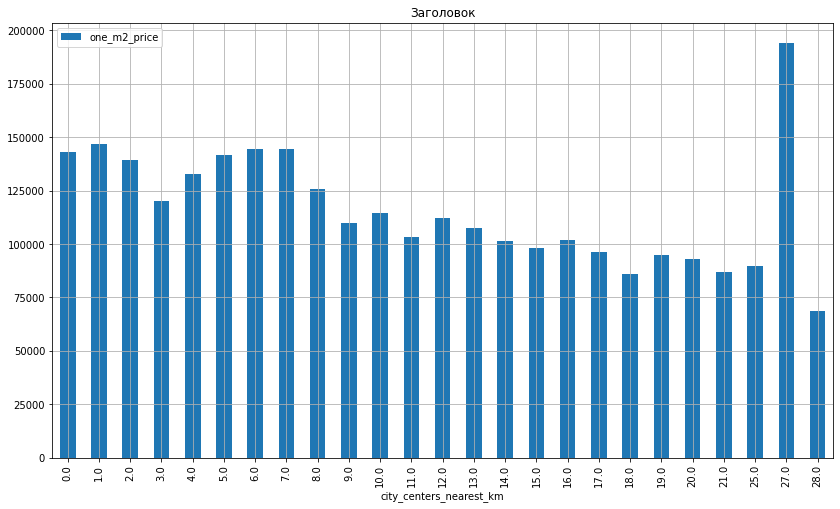

In [121]:
data_spb_pivot.plot(kind='bar', grid=True, figsize=(14,8), title = 'Заголовок');

**ВЫВОД**

Как и ожидалось, чем ближе к центру, тем дороже.


# Общий вывод

Проанализировав данные по объявлениям о продажах квартир в Санкт-Петербурге и Ленинградской области мы пришли к следующим выводам:

- Самая дорогая недвижимость, как и ожидалось, в Санкт-Петербурге
- На цену объекта сильнее всего влияет общая площадь помещения и удаленность от центра;
- Квартире на первых и последний этажах пользуются меньшей популярность, нежели все остальные
- Средняя стоимость составляет колеблется в диапозоне 4.2 - 5.9 млн. рублей
- Чаще всего продаются 1-,2- и 3-комнатные квартиры
- средняя площадь квартир _ 50-53 кв.м. Но встречаются и 900метровые гиганты.
- 5-этажных зданиц по-прежнему огромное количество
- Продажа квартиры, в среднем. занимает 3-4 месяца